In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
def game_a(capital, games, e = 0.005):
    #coin 1
    capital_list = [capital] + [0 for _ in range(games)]
    for i in range(1, games+1):
        curr_capital = capital_list[i-1]
        p_1 = 0.5 - e
        u = rd.uniform(0,1)
        if u <= p_1:
            capital_list[i] = curr_capital + 1
        else:
            capital_list[i] = curr_capital - 1
    return capital_list

In [3]:
def game_b(capital, games, e = 0.005, M =3):
    capital_list = [capital] + [0 for _ in range(games)]
    for i in range(1, games+1):
        curr_capital = capital_list[i-1]
        if curr_capital % M == 0:
            #play coin 2
            p_2 = 0.1 - e
            u = rd.uniform(0,1)
            if u <= p_2:
                capital_list[i] = curr_capital + 1
            else:
                capital_list[i] = curr_capital - 1
        else:
            #play coin 3
            p_3 = 0.75 - e
            u = rd.uniform(0,1)
            if u <= p_3:
                capital_list[i] = curr_capital + 1
            else:
                capital_list[i] = curr_capital - 1
    return capital_list

In [6]:
def sim_game_a(games = 20000, trials = 1000):
    capital_list = np.zeros((trials, games+1))
    for j in tqdm(range(trials)):
        capital_list[j, :] = np.array(game_a(0, games))
    mean_capital_list = np.mean(capital_list, axis=0)
    return mean_capital_list

In [5]:
def sim_game_b(games = 100, trials = 500000):
    capital_list = np.zeros((trials, games+1))
    for j in tqdm(range(trials)):
        capital_list[j, :] = np.array(game_b(0, games))
    mean_capital_list = np.mean(capital_list, axis=0)
    return mean_capital_list

In [6]:
def sim_rand_a_b(games = 100, trials = 500000):
    capital_list = np.zeros((trials, games+1))
    for j in tqdm(range(trials)):
        for k in range(1,games+1):
            curr_cap = capital_list[j, k-1]
            choice = rd.choice(['a', 'b'])
            if choice == 'a':
                #play game a
                curr_capital = game_a(curr_cap, 1)[-1]
                capital_list[j, k] = curr_capital
            else:
                #play game b
                curr_capital = game_b(curr_cap, 1)[-1]
                capital_list[j, k] = curr_capital
    mean_capital_list = np.mean(capital_list, axis=0)
    return mean_capital_list

In [7]:
def sim_AABB(games = 100, trials = 500000):
    sequence = 'AABB'*25
    capital_list = np.zeros((trials, games+1))
    for j in tqdm(range(trials)):
        for k in range(1, games+1):
            curr_cap = capital_list[j, k-1]
            if sequence[k-1] == 'A':
                curr_capital = game_a(curr_cap, 1)[-1]
                capital_list[j, k] = curr_capital
            else:
                curr_capital = game_b(curr_cap, 1)[-1]
                capital_list[j, k] = curr_capital
    mean_capital_list = np.mean(capital_list, axis=0)
    return mean_capital_list

In [7]:
#game_a_results = np.array(sim_game_a())
#game_b_results = np.array(sim_game_b())
#game_rand_results = np.array(sim_rand_a_b())
#game_ABAB_results = np.array(sim_AABB())
x_axis = np.arange(0,20001)

100%|██████████| 1000/1000 [00:13<00:00, 71.53it/s]


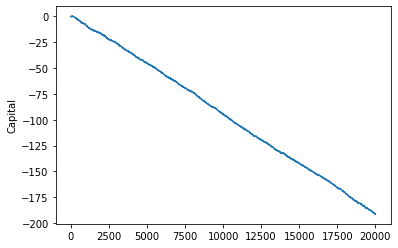

In [8]:
game_a_results = np.array(sim_game_a())
plt.plot(x_axis, game_a_results)
plt.ylabel('Capital')
plt.show()

100%|██████████| 500000/500000 [00:52<00:00, 9543.79it/s]


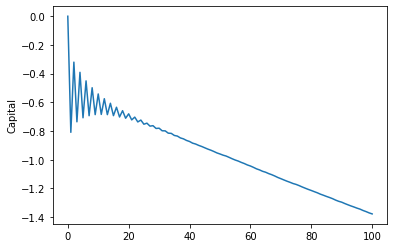

In [10]:
game_b_results = np.array(sim_game_b())
plt.plot(x_axis, game_b_results)
plt.ylabel('Capital')
plt.show()

100%|██████████| 500000/500000 [04:42<00:00, 1771.34it/s]


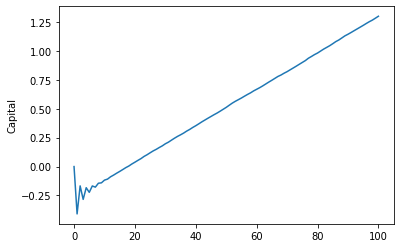

In [11]:
game_rand_results = np.array(sim_rand_a_b())
plt.plot(x_axis, game_rand_results)
plt.ylabel('Capital')
plt.show()

100%|██████████| 500000/500000 [03:25<00:00, 2430.49it/s]


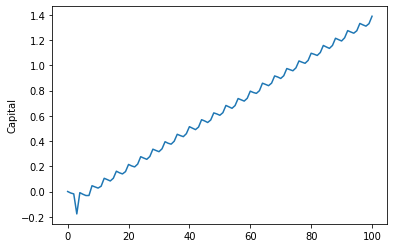

In [12]:
game_ABAB_results = np.array(sim_AABB())
plt.plot(x_axis, game_ABAB_results)
plt.ylabel('Capital')
plt.show()

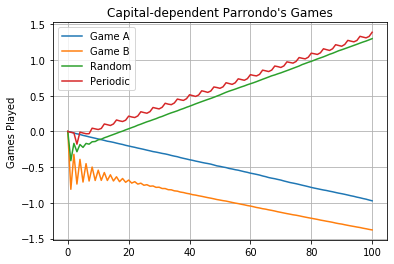

In [13]:
plt.plot(x_axis, game_a_results, label = 'Game A')
plt.plot(x_axis, game_b_results, label = 'Game B')
plt.plot(x_axis, game_rand_results, label = 'Random')
plt.plot(x_axis, game_ABAB_results, label = 'Periodic')
plt.ylabel('Capital')
plt.ylabel('Games Played')
plt.title("Capital-dependent Parrondo's Games")
plt.legend()
plt.grid()
plt.show()